In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.signal import fftconvolve

from util_fncs import makeMURA

# Source radioactivity as of 6/7/2020

A$_{Ba-133}$ = $3.27 \times 10^5$ dps

A$_{Cs-137}$ = $3.488 \times 10^5$ dps

A$_{Co-57}$  = $1.125 \times 10^5$ dps

A$_{Eu-152}$ = $3.26 \times 10^4$ dps

# Linepair Test Notes

Spatial frequency for the linepair test is defined as

$$\frac{1}{(2\times \text{line width}) ~\text{mm}} = X ~~\text{lp/mm}$$

# Simulation Setup

Source-detector distance: 50 cm

Environment: vacuum

Linepairs: 0.5 lp/mm

Source: Co-57

In [174]:
A_Ba = 3.27e5;
A_Cs = 3.488e5;
A_Co = 1.125e5;
A_Eu = 3.26e4;

simDecays = 1e7;

print("Simulated %.2f sec exposure" % (simDecays / A_Co))

Simulated 88.89 sec exposure


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
E      280 non-null float64
det    280 non-null int64
i      280 non-null int64
j      280 non-null int64
x0     280 non-null float64
y0     280 non-null float64
z0     280 non-null float64
dtypes: float64(4), int64(3)
memory usage: 15.4 KB


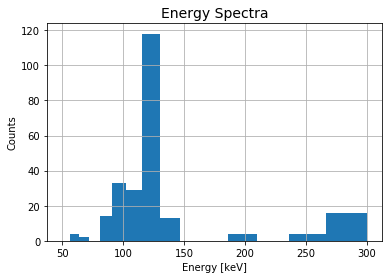

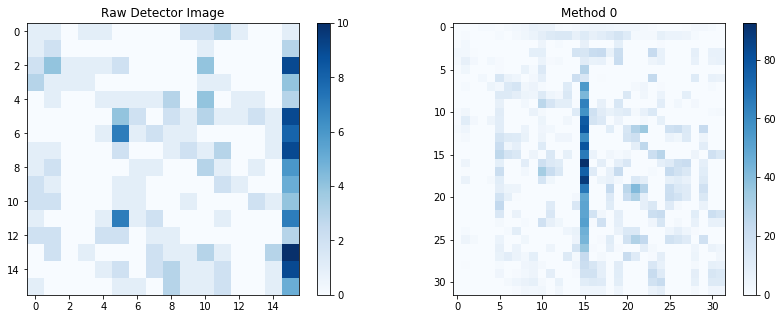

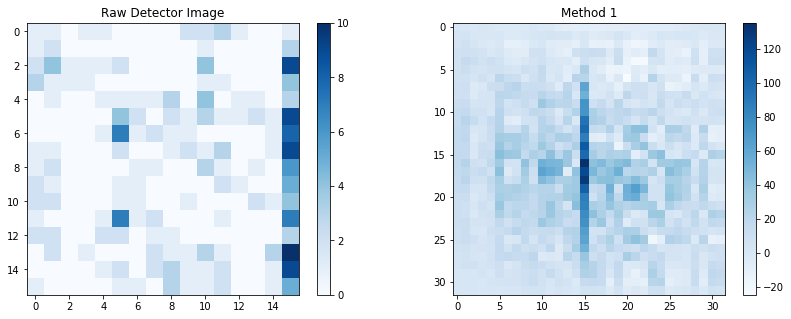

In [185]:
data = pd.read_csv("../data/hit_decayTest2.csv", names=['E','det','i','j','x0','y0','z0']);
#data = pd.read_csv("../data/hit_decayTest3.csv", names=['E','det','i','j','x0','y0','z0']);
data.info()


detectors = np.unique(data.det);

plt.figure(); plt.grid(); plt.xlabel('Energy [keV]'); plt.ylabel('Counts');
plt.hist(data.E, bins=np.logspace(np.log10(50), np.log10(300), 16));
plt.title("Energy Spectra", fontsize=14);

avg_image = np.zeros([16,16]);
for detID in detectors:
    sig = np.histogram2d(data.i[data.det == detID].values, data.j[data.det == detID].values, 
                        bins=[np.linspace(0,16,17),np.linspace(0,16,17)]);
    #plt.figure(figsize=(14,5));plt.subplot(1,2,1);c=plt.imshow(sig[0], cmap='Blues'); plt.colorbar(c);
    #plt.subplot(1,2,2); plt.imshow(fftconvolve(sig[0], decoder), cmap='Blues')
    avg_image += sig[0];
    
plt.figure(figsize=(14,5));
plt.subplot(1,2,1); plt.title("Raw Detector Image")
c=plt.imshow(avg_image, cmap='Blues');
plt.colorbar(c);

mask, decoder = makeMURA();

MF  = 1
rec_image1 = fftconvolve(avg_image - MF*np.mean(avg_image), decoder)
rec_image1[rec_image1 < 0] = 0

decoder[decoder == -1] = -0.7059;
rec_image2 = fftconvolve(avg_image, decoder)


plt.subplot(1,2,2);
c=plt.imshow(rec_image1, cmap='Blues');
plt.colorbar(c); plt.title("Method 0")


plt.figure(figsize=(14,5));
plt.subplot(1,2,1); plt.title("Raw Detector Image")
c=plt.imshow(avg_image, cmap='Blues');
plt.colorbar(c);

plt.subplot(1,2,2);
c=plt.imshow(rec_image2, cmap='Blues');
plt.colorbar(c); plt.title("Method 1");

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 7 columns):
E      268 non-null float64
det    268 non-null int64
i      268 non-null int64
j      268 non-null int64
x0     268 non-null float64
y0     268 non-null float64
z0     268 non-null float64
dtypes: float64(4), int64(3)
memory usage: 14.8 KB


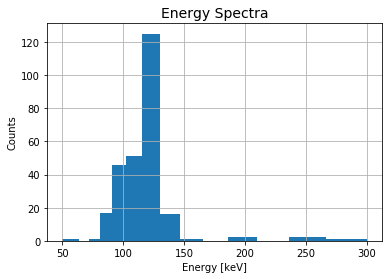

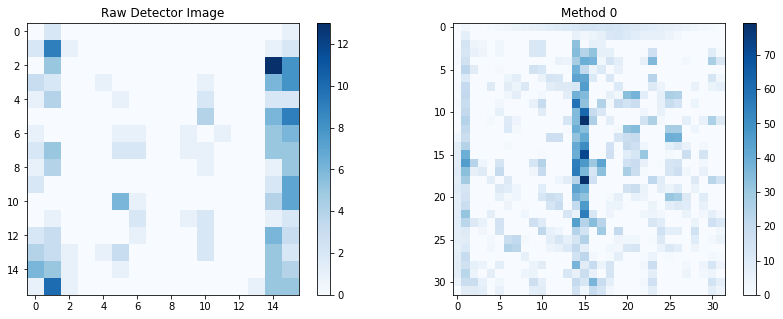

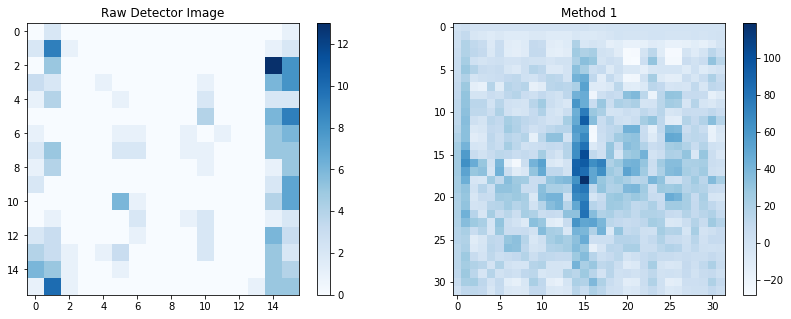

In [184]:
data = pd.read_csv("../data/hit_decayTest2.csv", names=['E','det','i','j','x0','y0','z0']);
data = pd.read_csv("../data/hit_decayTest3.csv", names=['E','det','i','j','x0','y0','z0']);
data.info()


detectors = np.unique(data.det);

plt.figure(); plt.grid(); plt.xlabel('Energy [keV]'); plt.ylabel('Counts');
plt.hist(data.E, bins=np.logspace(np.log10(50), np.log10(300), 16));
plt.title("Energy Spectra", fontsize=14);

avg_image = np.zeros([16,16]);
for detID in detectors:
    sig = np.histogram2d(data.i[data.det == detID].values, data.j[data.det == detID].values, 
                        bins=[np.linspace(0,16,17),np.linspace(0,16,17)]);
    #plt.figure(figsize=(14,5));plt.subplot(1,2,1);c=plt.imshow(sig[0], cmap='Blues'); plt.colorbar(c);
    #plt.subplot(1,2,2); plt.imshow(fftconvolve(sig[0], decoder), cmap='Blues')
    avg_image += sig[0];
    
plt.figure(figsize=(14,5));
plt.subplot(1,2,1); plt.title("Raw Detector Image")
c=plt.imshow(avg_image, cmap='Blues');
plt.colorbar(c);

mask, decoder = makeMURA();

MF  = 1
rec_image1 = fftconvolve(avg_image - MF*np.mean(avg_image), decoder)
rec_image1[rec_image1 < 0] = 0

decoder[decoder == -1] = -0.7059;
rec_image2 = fftconvolve(avg_image, decoder)


plt.subplot(1,2,2);
c=plt.imshow(rec_image1, cmap='Blues');
plt.colorbar(c); plt.title("Method 0")


plt.figure(figsize=(14,5));
plt.subplot(1,2,1); plt.title("Raw Detector Image")
c=plt.imshow(avg_image, cmap='Blues');
plt.colorbar(c);

plt.subplot(1,2,2);
c=plt.imshow(rec_image2, cmap='Blues');
plt.colorbar(c); plt.title("Method 1");